# DATASET REFERIDOS - MOTIVACIÓN Y AUDIENCIA
El dataset seleccionado para analizar, esta compuesto por los referidos de un Sistema que otorga Créditos Personales a una población que no sería aprobada para un préstamo en una entidad bancaria. 
  Los datos son analizados por un Motor de Riesgos que determinará si finalmente se consideran aptos para recibir una oferta o no (Los clientes aprobados serán identificados con la variable *approved* en *True*). Para saber si una persona puede optar o no por un crédito, la politica que se encuentra en el motor de decisión se basa en el análisis de distintos aspectos socioeconómicos de la persona, para luego asignarles a cada uno un puntaje o *score*.
  Este puntaje obtenido, sera pieza fundamental para determinar la decisión final; ya que de él depende la aprobación o el monto que se le otorgará al cliente. Los referidos, se agrupan por su nivel socioeconómico y su situación actual (Que muestra la mora que presenta un cliente con otras entidades) y es posible identificar si su género es masculino o femenino. Por otro lado, los montos máximos otorgados también dependerán del análisis de Riesgo mencionado anteriormente. Por ello, encontramos importante observar cómo se comporta el monto según situación actual, score, género y nivel socioeconómico; ya que esto nos permitirá atraer una mejor población para incrementar la otorgacion y disminuir la mora.
  En este caso, quisiéramos resolver las siguientes interrogantes:

*   ¿Cuál es el monto máximo otorgado? ¿Y el mínimo?
*   ¿Se otorgan más montos de mayor o de menor valor? ¿Existe una relación entre monto y cantidad de créditos otorgados?
* Comparando los referidos entre hombres y mujeres, ¿Existe una diferencia notable entre esta cantidad? ¿A quiénes se le otorgan mayores montos? ¿Qué cantidad de ellos son aprobados?
* En relación a la cantidad de referidos, ¿Qué porcentaje de ellos finalmente es aprobado?
* ¿Cuál es el grupo de Nivel Socioeconómico que posee mayor puntaje de Riesgo? ¿Existe una diferencia significativa entre los puntajes?




# PROBLEMA COMERCIAL
El número de referidos rechazados es muy alto y analizar estos casos genera una pérdida, puesto que se utilizan otras entidades para tomar la decisión final. Por este motivo, debemos buscar una mejor población tomando como referencia aquella que ha sido aprobada para obtener una mejor tasa de aprobación y disminuir los costos.


# PREGUNTAS/HIPÓTESIS
* ¿Cómo se puede identificar al sector de referidos rechazados? ¿Existe algún factor en común entre ellos?
* ¿Cómo se puede identificar al sector de referidos aprobados? ¿Existe algún factor en común entre ellos?
* ¿Los referidos rechazados representan un porcentaje importante del total?
* ¿Existe una diferencia en aprobados por su género?
* ¿Existe algún sector socioeconómico que se destaque por poseer mayor/menor número de aprobados?
* En base a los casos que analizamos diariamente, notamos que la mayoría de referidos aprobados son hombres en edades promedios entre 18 y 25 años.


# DEFINICIÓN DEL OBJETIVO
El objetivo principal de nuestro análisis es identificar los rasgos de los referidos que posiblemente serán aprobados por el motor para así poder tomar acciones por ej: campañas de publicidad para poder atraer a ese grupo poblacional.

# CONTEXTO COMERCIAL
En el sistema, los clientes pueden provenir de dos fuentes. Por un lado, se encuentran aquellos que inician una solicitud directamente desde la web y, por el otro se encuentran los Referidos. Estos últimos, son una fuente fundamental para el ingreso de clientes puesto que proveen información sobre clientes potenciales (podrán ser aprobados o rechazados).
En este caso, nos centraremos únicamente en el funcionamiento de los referidos. Por ello, es importante analizar los rasgos que identifican al sector que finalmente es apto para recibir un crédito. De esta manera, será posible presentar los resultados obtenidos a los Referidos y así poder tomar acciones preventivas para incrementar el número de referidos exitosos.

# CONTEXTO ANALÍTICO
El equipo de riesgos ha recibido datos sobre los últimos 2000 referidos recibidos el 30 de Agosto. Los mismos, identifican mediante la variable *approved* si han sido o no aprobados respectivamente. Debemos utilizar **modelos de agrupamiento** para abordar este problema de **aprendizaje no supervisado**.

# **Configuración de dataset y librerías**

In [43]:
#librerias para el manejo de datos
import pandas as pd
import numpy as np

#librerias para graficar
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#librerias para modelar modelos
import statsmodels.api as sm
import statsmodels.formula.api as sf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


mpl.style.use('bmh')
#Url Dataset
url = 'https://raw.githubusercontent.com/msolpierozzi/DATA-SCIENCE-DATASETS/master/REFERRALS_10000_ROWS.csv'

#funciones
def deleteColumns(df, columns):
  for i in range(0, len(columns)):
    df.drop(columns[i], inplace=True, axis=1)

def countMissingDataByColumn(missing_data):
  for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

def readCsv(url):
  df = pd.read_csv(url, on_bad_lines='skip')
  return df

def describe(df):
  return df.describe()

def head(df):
  return df.head()

def groupBy(df, column):
  return df.groupby([column])

def index(df):
  return df.index

def isnull(df):
  return df.isnull()

def printLine(data):
  print("---------------------"+data+"---------------------")


Leer dataset y eliminar columnas no deseadas

In [44]:
df = pd.read_csv(url, on_bad_lines='skip')

In [45]:
printLine("IS NULL")
print(isnull(df))
printLine("")

printLine("DESCRIBE DATASET 1")
print(describe(df))
printLine("")


printLine("HEAD DATASET 1")
print(head(df))
printLine("")


printLine("INDEX")
print(index(df))
printLine("")

printLine("GROUP BY GENDER")
print(df.groupby("gender").agg({"max_amount": "mean"}))
printLine("")

printLine("GROUP BY CURRENT SITUATION")
print(df.groupby("current_situation").agg({"max_amount": ["mean", "sum"]}))
printLine("")

printLine("TOP 10 MAX AMOUNT")
print(df[["max_amount", "gender", "current_situation", "term", "created_at"]].sort_values(by="max_amount",ascending=False).head(10))
printLine("")

deleteColumns(df, ["birthday", "updated_at", "person_query_id", "id", "tries", "created_at", "informed", "approved", "min_term", "term"])

---------------------IS NULL---------------------
         id  gender  entity_code  person_query_id  approved  \
0     False   False        False            False     False   
1     False   False        False            False     False   
2     False   False        False            False     False   
3     False   False        False            False     False   
4     False   False        False            False     False   
...     ...     ...          ...              ...       ...   
9995  False   False        False            False     False   
9996  False   False        False            False     False   
9997  False   False        False            False     False   
9998  False   False        False            False     False   
9999  False   False        False            False     False   

      current_situation  score_risk  score_nosis  socioeconomic_level    cda  \
0                 False       False        False                False  False   
1                 False       Fal

In [46]:
df.columns

Index(['gender', 'entity_code', 'current_situation', 'score_risk',
       'score_nosis', 'socioeconomic_level', 'cda', 'rate', 'max_amount'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               10000 non-null  int64  
 1   entity_code          10000 non-null  int64  
 2   current_situation    10000 non-null  int64  
 3   score_risk           10000 non-null  float64
 4   score_nosis          10000 non-null  int64  
 5   socioeconomic_level  10000 non-null  object 
 6   cda                  10000 non-null  object 
 7   rate                 10000 non-null  int64  
 8   max_amount           10000 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [48]:
#Cantidad de aprovadosen el data set
sp = df.gender.value_counts()
sp = pd.DataFrame(sp)
sp.T

,1,0
gender,5571,4429


# ¿Existe alguna diferencia entre los montos y la cantidad de aprobados por género?

# ¿Existe una relación entre la cantidad de aprobados por género? ¿Se otorgan más créditos a hombres o a mujeres?

([<matplotlib.patches.Wedge at 0x7fa48fd62970>,
 [Text(0.19626685212181294, 1.0823489838116884, 'Femenino'),
  Text(-0.19626685212181283, -1.0823489838116884, 'Masculino')],
 [Text(0.10705464661189795, 0.5903721729881937, '44.3 %'),
  Text(-0.1070546466118979, -0.5903721729881937, '55.7 %')])

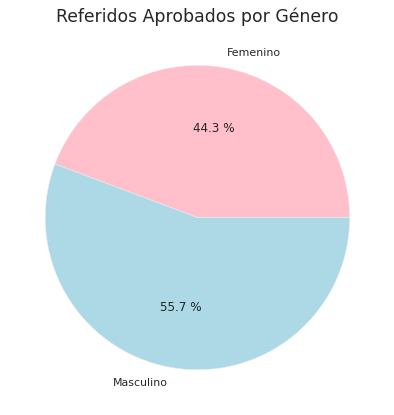

In [49]:
# Gráfico 2: Pie de aprobados por Género
approvedF = df.query("gender == 0")
approvedM = df.query("gender == 1")
approvedByGender = [len(approvedF.index), len(approvedM.index)]
fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('Referidos Aprobados por Género')
ax.pie(approvedByGender, labels = ['Femenino', 'Masculino'], colors=['pink', 'lightblue'], autopct="%0.1f %%")




A partir del gráfico obtenido, podemos afirmar que los aprobados en su mayoría son hombres, superando casi en un 20% al porcentaje femenino.


# ¿A quiénes se le otorgan mayores montos? 

---



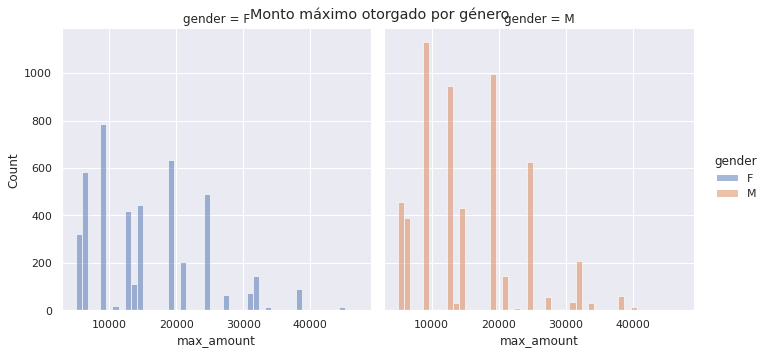

In [50]:
##### SEABORN ##############
df.loc[df['gender'] == 0, 'gender'] = 'F'
df.loc[df['gender'] == 1, 'gender'] = 'M'

df_sin_nulls = df.dropna()
max_amounts = df_sin_nulls[["max_amount", "gender"]]
sns.set()

#Gráfico 1: Gráfico de barras de Monto máximo dividido por género
g1 = sns.displot(data=max_amounts, x="max_amount", hue="gender", col="gender")
g1.fig.suptitle('Monto máximo otorgado por género')
plt.show()

Se les otorgan mayores montos a los hombres que a las mujeres, siendo la cantidad más otorgada de 10.000 en hombres y 5000 en mujeres.

# **¿El puntaje de riesgo varía según el nivel socioeconómico?**



<BarContainer object of 10000 artists>

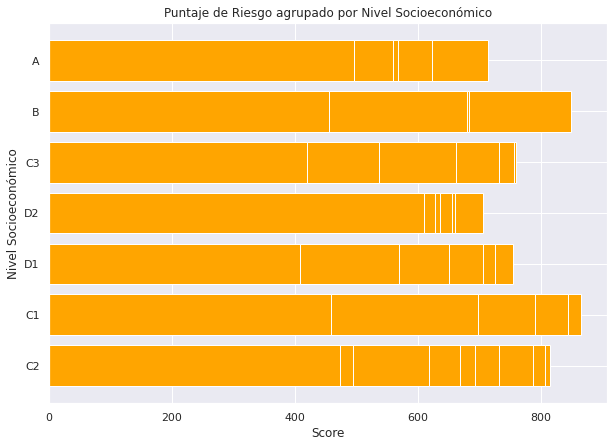

In [51]:
#Gráfico 2: Gráfico de barras de puntaje de Risk por Nivel Socioeconómico
fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title('Puntaje de Riesgo agrupado por Nivel Socioeconómico')
ax.set_xlabel('Score')
ax.set_ylabel('Nivel Socioeconómico')
ax.barh(df_sin_nulls.socioeconomic_level, df_sin_nulls.score_risk, color=['orange'])


Podemos observar que no existe una variación muy marcada entre el score otorgado por el motor de riesgo en cuanto al nivel socioeconómico de la persona.Por otra lado, el nivel que más puntaje obtuvo es el Nivel Socioeconómico C1 que corresponde a profesionales independientes mientras que la clase A representan a la clase socioeconómica más alta dentro de nuestro problema.


In [52]:
df.corr()

,entity_code,current_situation,score_risk,score_nosis,rate,max_amount
entity_code,1.000000,0.029781,0.347962,-0.039577,-0.056987,0.137876
current_situation,0.029781,1.000000,-0.163153,-0.357259,-0.391067,-0.023403
score_risk,0.347962,-0.163153,1.000000,0.336210,0.263675,0.733456
score_nosis,-0.039577,-0.357259,0.336210,1.000000,0.292143,0.175907
rate,-0.056987,-0.391067,0.263675,0.292143,1.000000,0.291413
max_amount,0.137876,-0.023403,0.733456,0.175907,0.291413,1.000000


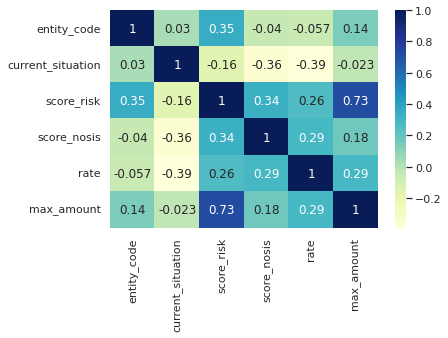

In [53]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

**Gráficos en base a la columna socioeconomic_level**

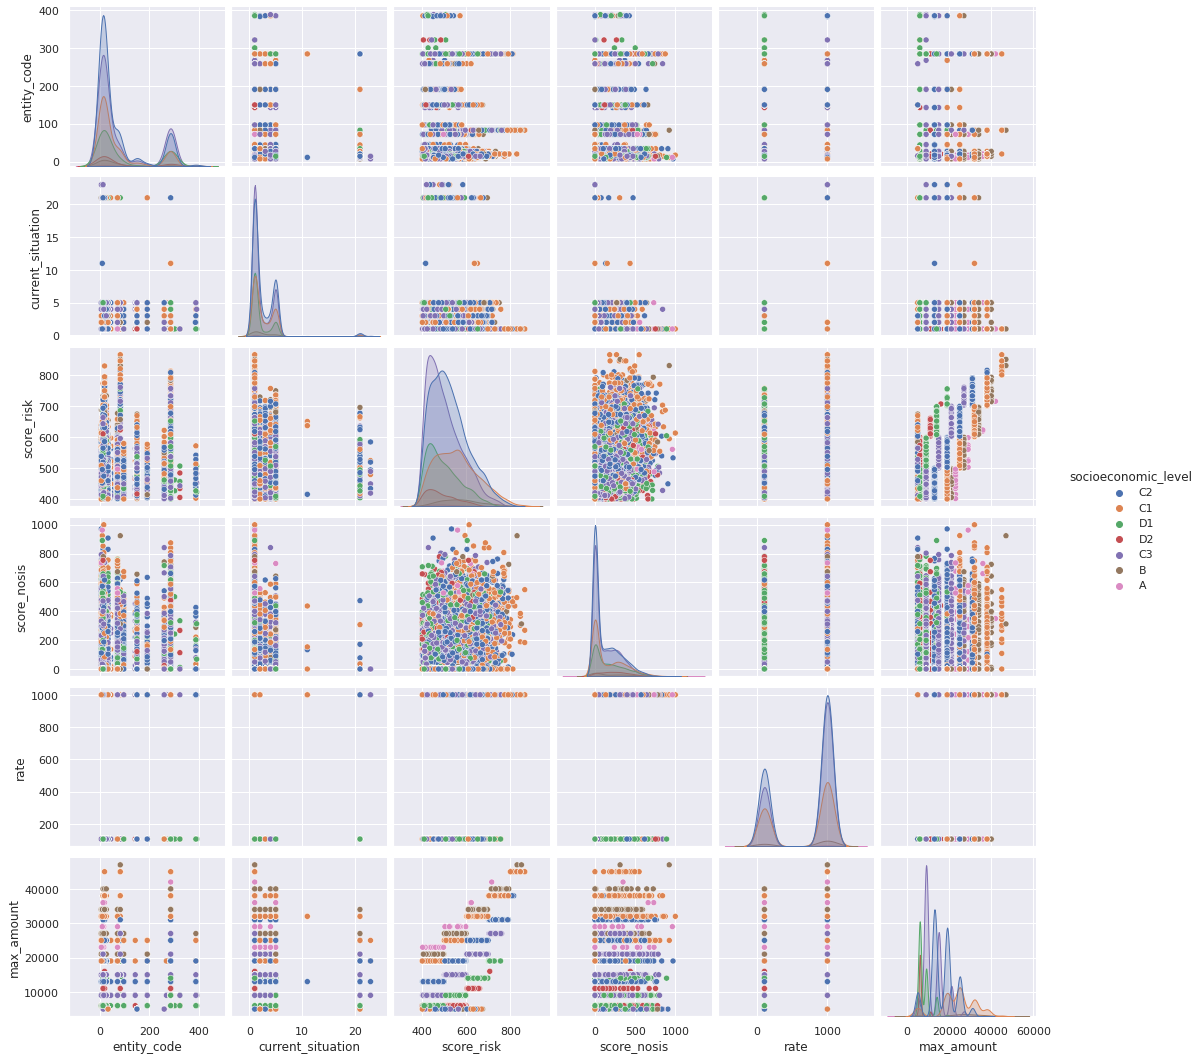

In [54]:
g = sns.pairplot(df, kind='scatter', hue='socioeconomic_level')

Seleccionamos las variables más representativas para hacer el gráfico más específico

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


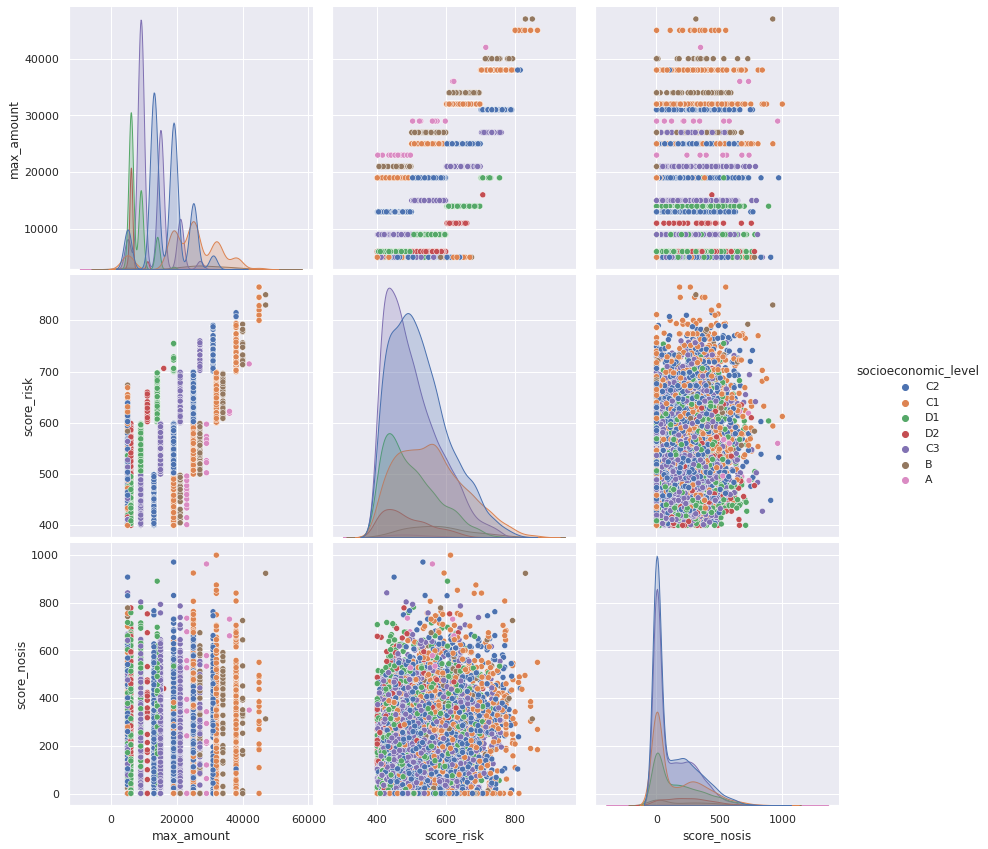

In [55]:
sns.pairplot(df, hue='socioeconomic_level',size=4,vars=["max_amount","score_risk","score_nosis"],kind='scatter')

##ELEGIR UN MÉTODO DE FEATURE ENG PARA REDUCIR LA DIMENSIONALIDAD DEL DATASET
 1. Transformar variables categóricas a variables numéricas.
  - Utilizamos ***Label Encoder*** para identificar las variables categóricas 
 con un número
  - Manejaremos los datos faltantes.

2. Realizar Data Sampling


In [56]:
df.socioeconomic_level.value_counts()

C2    3422
C3    2995
C1    1777
D1    1238
D2     328
B      205
A       35
Name: socioeconomic_level, dtype: int64

# Reemplazo de variables
* Reemplazamos las variables categóricas
* Actualizamos los valores no definidos por 0
* Asignamos puntajes a la variable socieconomic_level para un mejor análisis

In [57]:
df.loc[df['socioeconomic_level'] == 'A', 'socioeconomic_level'] = 1
df.loc[df['socioeconomic_level'] == 'B', 'socioeconomic_level'] = 2
df.loc[df['socioeconomic_level'] == 'C1', 'socioeconomic_level'] = 3
df.loc[df['socioeconomic_level'] == 'C2', 'socioeconomic_level'] = 4
df.loc[df['socioeconomic_level'] == 'C3', 'socioeconomic_level'] = 5
df.loc[df['socioeconomic_level'] == 'D1', 'socioeconomic_level'] = 6
df.loc[df['socioeconomic_level'] == 'D2', 'socioeconomic_level'] = 7

df.loc[df['cda'] == 'Aprobado', 'cda'] = 1
df.loc[df['cda'] == 'Observado', 'cda'] = 2

df.loc[df['gender'] == 'F', 'gender'] = 0
df.loc[df['gender'] == 'M', 'gender'] = 1

df = df.fillna(0)
df.head()


,gender,entity_code,current_situation,score_risk,score_nosis,socioeconomic_level,cda,rate,max_amount
0,0,386,1,482.50,1,4,1,1000,13000.0
1,0,72,2,476.25,1,3,1,1000,19000.0
2,1,72,5,437.50,1,3,1,107,19000.0
3,1,17,1,453.75,570,4,1,1000,13000.0
4,0,20,2,520.00,1,6,1,107,9000.0


# DATA SAMPLING

In [58]:
import random

def randomSampling(data, n):
    randomSample = []
    for i in range (0, n):
      randomSample.append(random.choice(data))
    return(randomSample)

n = 2000
npArr = df.to_numpy()
print(list(npArr).count)
randomSample = randomSampling(npArr, n)
dfSample = pd.DataFrame(randomSample)
dfSample.columns = df.columns

print(dfSample.head())
print(dfSample.describe())

<built-in method count of list object at 0x7fa488f3b3c0>
   gender  entity_code  current_situation  score_risk  score_nosis  \
0     1.0         14.0                5.0      518.75          1.0   
1     0.0          7.0                1.0      435.00        251.0   
2     0.0         83.0                5.0      711.25          1.0   
3     1.0        285.0                3.0      556.25          1.0   
4     0.0         11.0                1.0      595.00        346.0   

   socioeconomic_level  cda    rate  max_amount  
0                  4.0  1.0   107.0     19000.0  
1                  5.0  1.0  1000.0      9000.0  
2                  3.0  1.0   107.0     38000.0  
3                  4.0  1.0   107.0     19000.0  
4                  4.0  1.0  1000.0     19000.0  
           gender  entity_code  current_situation   score_risk  score_nosis  \
count  2000.00000  2000.000000        2000.000000  2000.000000  2000.000000   
mean      0.56950    76.281500           2.465000   519.304000  

##ELEGIR UN ALGORITMO DE CLASIFICACIÓN O REGRESIÓN PARA ENTRENAR LOS DATOS
Algoritmo de clasificación: CLUSTERING No jerárquico - K-Means.
Su función es encontrar una estructura o un patrón en una colección de datos no clasificados.
Se utilizan en el aprendizaje no supervisado, y sirven para categorizar datos no etiquetados, es decir, datos sin categorías o grupos definidos.
El algoritmo funciona mediante la búsqueda de grupos dentro de los datos, con el número de grupos representados por la variable K. Funciona de manera iterativa para asignar cada punto de datos a uno de los K grupos según las características proporcionadas.

     gender  entity_code  current_situation  score_risk  score_nosis  \
26        0           20                  1      678.75          294   
10        0           17                  5      413.75            1   
176       1           20                  1      698.75          276   

     socioeconomic_level  cda  rate  max_amount  
26                     6    1   107     14000.0  
10                     6    2   107      6000.0  
176                    3    1  1000     32000.0  


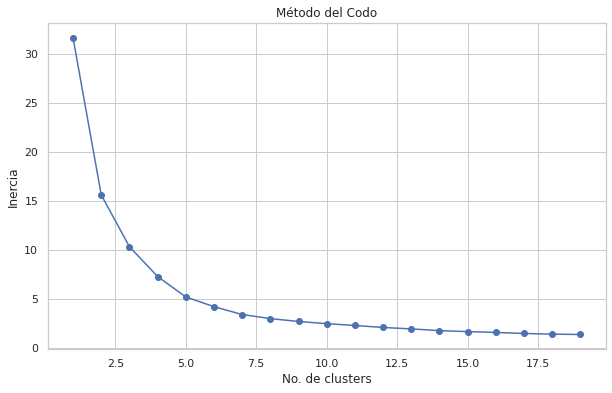

In [105]:
### DATOS DE MUESTRA ###
#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indexes = [26, 10, 176]

def getElements(df, indexes):
  new_df= df.iloc[indexes, :]
  return new_df

def dropElements(df, indexes):
  new_df = df.drop(df.index[indexes])
  return new_df

muestras = getElements(df, indexes)
data = dropElements(df, indexes)

print(muestras)


from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)
### ANÁLISIS DE MACHINE LEARNING ###
from sklearn.cluster import KMeans

#Se determina las variables a evaluar
X = data_escalada.copy()

## Hallar el valor óptimo de K ##
#Se aplicará el método de codo para hallar K
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 4
Muestra 2 se encuentra en el clúster: 1


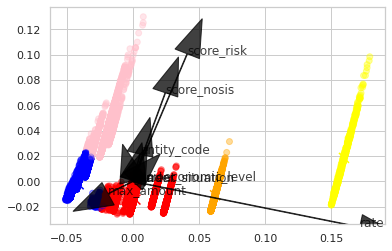

In [106]:
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 5, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

#Se entrena el algoritmo
algoritmo.fit(X)

#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'yellow', 'orange', 'pink']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()

# CÁLCULO DE MÉTRICAS PARA VALIDAR EL MODELO

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
sns.set_style('whitegrid')

data = df
data.head()

# definimos matriz de diseño X y vector respuesta y
X = df
y = abs(pd.Series(data['socioeconomic_level'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
xTestPred = modelo.predict(X_test) 

print("SOCIOECONOMIC_LEVEL")
print(classification_report(y_pred = xTestPred, y_true = y_test))

SOCIOECONOMIC_LEVEL
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.96      1.00      0.98        45
           2       1.00      1.00      1.00       368
           3       1.00      1.00      1.00       649
           4       1.00      1.00      1.00       608
           5       1.00      1.00      1.00       262
           6       1.00      1.00      1.00        59

    accuracy                           1.00      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       1.00      1.00      1.00      2000



In [62]:
modelo.feature_importances_

array([2.41211396e-03, 9.85667582e-03, 1.91919582e-02, 4.18271075e-02,
       1.07466521e-02, 6.81330633e-01, 4.47551739e-04, 4.29112342e-02,
       1.91276074e-01])

In [79]:
len(modelo.feature_importances_)

9

In [80]:
len(X_train.columns)

9

Identificar las columnas non-null y el tipo de dato de cada una del df xTrain


In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2694 to 235
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               8000 non-null   int64  
 1   entity_code          8000 non-null   int64  
 2   current_situation    8000 non-null   int64  
 3   score_risk           8000 non-null   float64
 4   score_nosis          8000 non-null   int64  
 5   socioeconomic_level  8000 non-null   int64  
 6   cda                  8000 non-null   int64  
 7   rate                 8000 non-null   int64  
 8   max_amount           8000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 625.0 KB


In [108]:
# Identificar a las columnas numéricas y categóricas del df
def get_num_cat_cols(df):
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Columnas numéricas \n',num_cls)
    print(f'Columnas categóricas \n',cat_cls)
    
    return num_cls, cat_cls

In [83]:
num_cols, cat_cols = get_num_cat_cols(X_train)

Columnas numéricas 
 ['gender', 'entity_code', 'current_situation', 'score_risk', 'score_nosis', 'socioeconomic_level', 'cda', 'rate', 'max_amount']
Columnas categóricas 
 []


In [84]:
# Estadísticas descriptivas para las columnas numéricas
X_train[num_cols].describe()

,gender,entity_code,current_situation,score_risk,score_nosis,socioeconomic_level,cda,rate,max_amount
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,0.553375,77.069250,2.360125,519.600031,142.937625,4.417375,1.020000,614.112375,15379.00000
std,0.497174,103.607671,2.545191,86.298274,176.362517,1.095593,0.140009,442.394455,8102.38021
min,0.000000,7.000000,1.000000,400.000000,1.000000,1.000000,1.000000,107.000000,5000.00000
25%,0.000000,11.000000,1.000000,448.750000,1.000000,4.000000,1.000000,107.000000,9000.00000
50%,1.000000,17.000000,1.000000,503.750000,54.000000,4.000000,1.000000,1000.000000,13000.00000
75%,1.000000,72.000000,4.000000,572.500000,263.000000,5.000000,1.000000,1000.000000,19000.00000
max,1.000000,389.000000,23.000000,865.000000,999.000000,7.000000,2.000000,1000.000000,47000.00000


In [69]:
#Asegurarse de que no haya valores null
X_train.isnull().sum()

gender                 0
entity_code            0
current_situation      0
score_risk             0
score_nosis            0
socioeconomic_level    0
cda                    0
rate                   0
max_amount             0
dtype: int64

In [70]:
X_test.isnull().sum()

gender                 0
entity_code            0
current_situation      0
score_risk             0
score_nosis            0
socioeconomic_level    0
cda                    0
rate                   0
max_amount             0
dtype: int64

<BarContainer object of 9 artists>

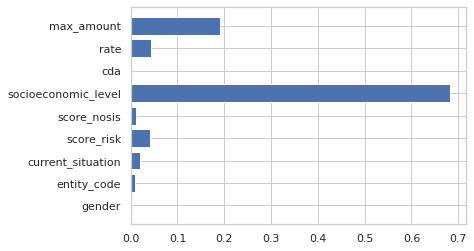

In [71]:
plt.barh(X_train.columns, modelo.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

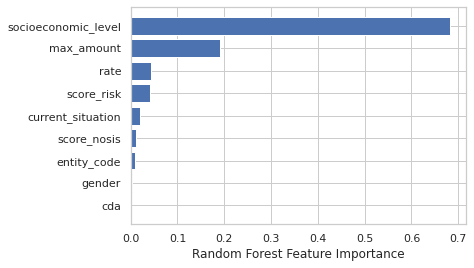

In [72]:
sorted_idx = modelo.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], modelo.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

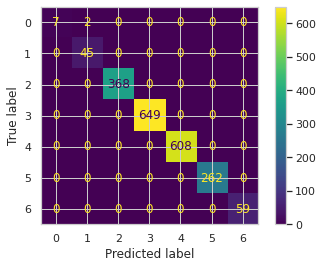

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, xTestPred, labels= modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= modelo.classes_)
disp.plot()
plt.show()